#### Dataset

In [2]:
# Mall_Customers.csv
# https://mitu.co.in/dataset

#### Import the libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Load the data

In [6]:
df = pd.read_csv('datasets/Mall_Customers.csv')

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Store the input data

In [11]:
x = df.iloc[:,3:]

In [12]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Elbow Method

In [15]:
from sklearn.cluster import KMeans

In [24]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

In [25]:
km.fit(x)

KMeans(n_clusters=5, n_init='auto', random_state=0)

In [26]:
km.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [28]:
# SSE
km.inertia_

44448.45544793371

In [29]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit(x) 
    sse.append(km.inertia_)

In [30]:
sse

[269981.28,
 185917.14253928524,
 106348.37306211119,
 73679.78903948836,
 44448.45544793371,
 38858.9599751439,
 31969.42655023548,
 29858.483597603947,
 22209.851608025547,
 20786.93669205916,
 18612.22286800968,
 17083.67250170932,
 16511.947370563892,
 15599.148331445116,
 14697.298899626936]

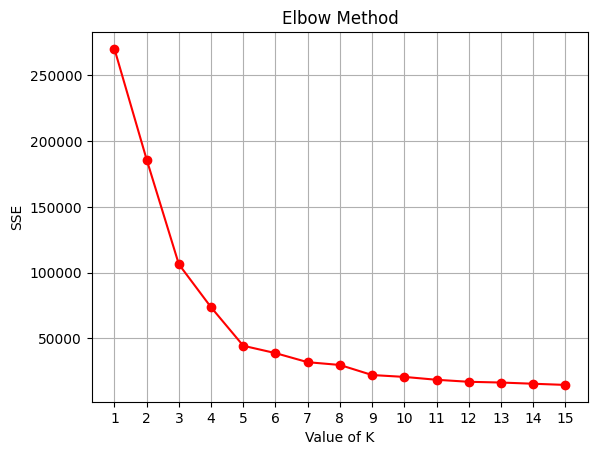

In [32]:
plt.title('Elbow Method')
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker = 'o', color = 'r', )

In [33]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [34]:
from kneed import KneeLocator

In [42]:
kn = KneeLocator(range(1,16), sse, direction='decreasing', curve='convex')

In [43]:
kn.elbow

5

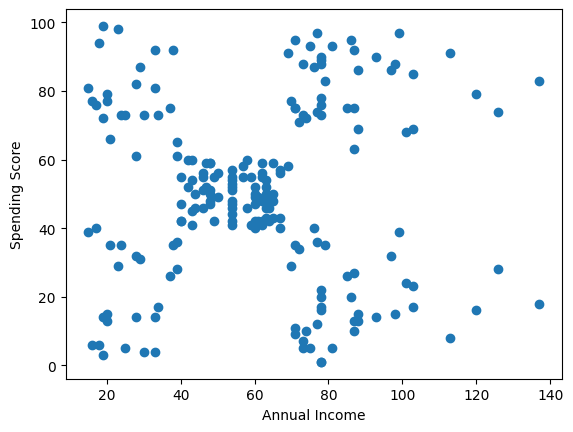

In [44]:
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1])

#### Silhoutte Analysis

In [46]:
from sklearn.metrics import silhouette_score

In [49]:
silh = []
for k in range(2,16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    labels = km.fit_predict(x) 
    score = silhouette_score(x, labels)
    silh.append(score)

<BarContainer object of 14 artists>

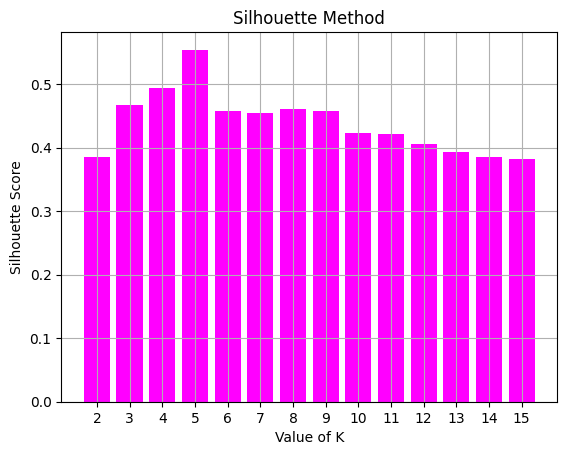

In [50]:
plt.title('Silhouette Method')
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color = 'magenta' )

#### Build the clusters

In [52]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

In [53]:
labels = km.fit_predict(x)

In [54]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [55]:
km.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [56]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

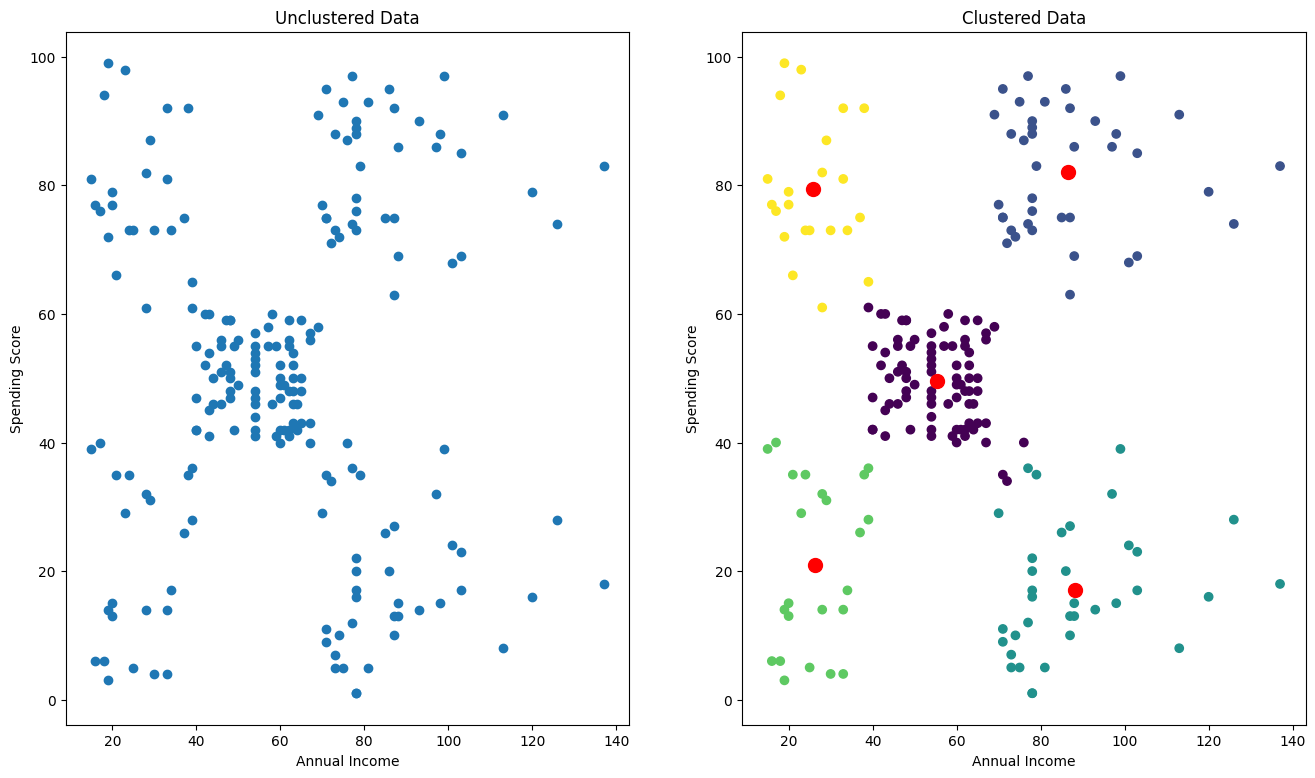

In [63]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Unclustered Data")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1])
plt.subplot(1,2,2)
plt.title("Clustered Data")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=labels)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
            marker = 'o', s=100, color = 'r')

#### Extract the clusters

In [67]:
zero = df[labels==0]
one = df[labels==1]
two = df[labels==2]
three = df[labels==3]
four = df[labels==4]

In [68]:
zero.shape, one.shape, two.shape, three.shape, four.shape

((81, 5), (39, 5), (35, 5), (23, 5), (22, 5))

#### Save the clusters

In [70]:
zero.to_csv('zero.csv', index=False)

#### Predict the value in cluster

In [72]:
newdf = pd.DataFrame([[22,25],[87,76],[111,28],[56,62],[45,100]], 
                     columns=x.columns)

In [73]:
newdf

,Annual Income (k$),Spending Score (1-100)
0,22,25
1,87,76
2,111,28
3,56,62
4,45,100


In [74]:
km.predict(newdf)

array([3, 1, 2, 0, 4], dtype=int32)

In [75]:
x['label'] = labels

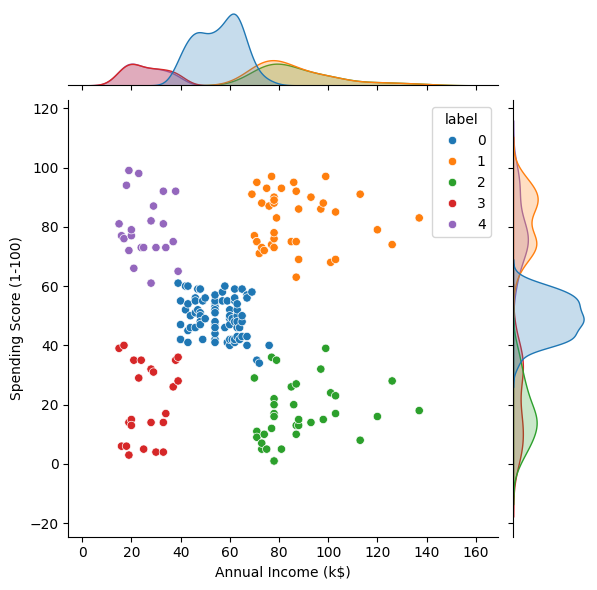

In [77]:
sns.jointplot(x=x.columns[0], y=x.columns[1], 
              data = x, hue = 'label', palette='tab10')